In [ ]:
Possible Tasks for IPL Project:
1. Total no. of wins by each Team.
2. Top 20 Players with most MOM awards
3. Which City has hosted most no. of matches?
4. No. of matches hosted at each stadium
5. MI vs CSK, Clash of Titans
6. MI vs Pune Team
7. Result probability after winning the Toss
8. Season wise performance of each Team.
9. Biggest win by runs each season.
10. Payed vs Win by each Team participated in IPL
11. Which Umpire has participated in max. number of matches.
12. Average/Total runs per season
13. Run distribution per over.
14. Number of times, Target of 200 and plus by each team
15. Target of 200+ and how many teams and number of times chased.
16. average Runs scored per over by each team.
17. Powerplay Analysis
18. Highest Average/Strike rate for both Batsman and Bowler(atleast 30 matches played).
19. Top 20 Batsman
20. Top 20 Bowlers
21. Orange and Purple Cap per season analysis
22. Century, 50's and 30's run scored analysis per batsman.
23. Strike rate of Bowler.
24. Highest number of runs scored as percentage of Boundaries.
25. Extra run given by each team analysis.
26. Most catches by any Fielder
27. comparison between any particular batsman (Sachin Tendulkar) vs bowler(Shane Warne)
28. Fielder Analysis
29. Filder wih max. points.
30. Bowler analysis during Powerplay and Last 4 overs.
31. Best Partnership - max. runs scored
32. Fantasy League - Select Best playing 11
Condition:
Max. 3 players from a particular Team 
Points criteria for Batsman:
>30 -2 points
>50 -4 points
>100 -8 points
Points criteris for Bowler:
>1 - 2 points
>3 - 4 points
>5 - 8 points
Points Criteria for Fielder:
Caught 1 - 2 points
so and so forth

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\OWNER\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
score_df=pd .read_csv(r"F:\Data Science_1March_Komal\ipldata\deliveries.csv")
match_df=pd .read_csv(r"F:\Data Science_1March_Komal\ipldata\matches.csv")

#tips = sns.load_dataset(r"F:\Data Science_1March_Komal\fifa19\data.csv")
#score_df.head()
match_df.head(5)
score_df.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [3]:
match_df.shape

(756, 18)

In [4]:
match_df.nunique()

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

In [5]:
match_df.count()

id                 756
season             756
city               749
date               756
team1              756
team2              756
toss_winner        756
toss_decision      756
result             756
dl_applied         756
winner             752
win_by_runs        756
win_by_wickets     756
player_of_match    752
venue              756
umpire1            754
umpire2            754
umpire3            119
dtype: int64

In [6]:
match_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [7]:
match_df['season']

0      2017
1      2017
2      2017
3      2017
4      2017
       ... 
751    2019
752    2019
753    2019
754    2019
755    2019
Name: season, Length: 756, dtype: int64

### Sesonwise matches count

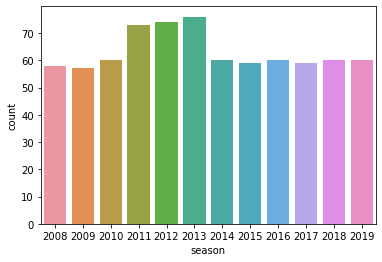

In [8]:
sns.countplot('season',data=match_df)

In [9]:
# There is a spike in the middle for three years where the number of matches are more than 70.

#### Number of matches in each venue:

4. No. of matches hosted at each stadium
fav_ground = match_df['venue'].value_counts().reset_index()
fav_ground.columns = ['venue','count']
sns.barplot(x = 'count',y = 'venue', data = fav_ground[:10], palette = 'Reds')

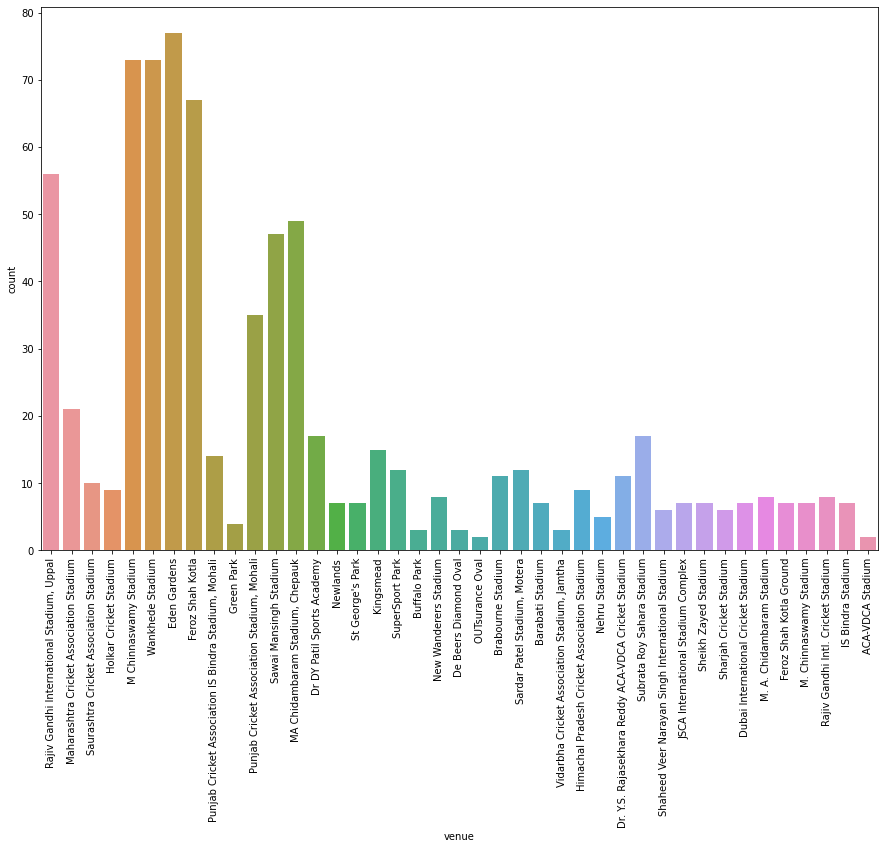

<bound method IndexOpsMixin.nunique of 0      Rajiv Gandhi International Stadium, Uppal
1        Maharashtra Cricket Association Stadium
2         Saurashtra Cricket Association Stadium
3                         Holkar Cricket Stadium
4                          M Chinnaswamy Stadium
                         ...                    
751                             Wankhede Stadium
752                    M. A. Chidambaram Stadium
753                             ACA-VDCA Stadium
754                             ACA-VDCA Stadium
755           Rajiv Gandhi Intl. Cricket Stadium
Name: venue, Length: 756, dtype: object>

In [10]:
#4. No. of matches hosted at each stadium

plt.figure(figsize=(15,10))
sns.countplot(x='venue',data=match_df)
plt.xticks(rotation='vertical')

plt.show()
match_df['venue'].nunique

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

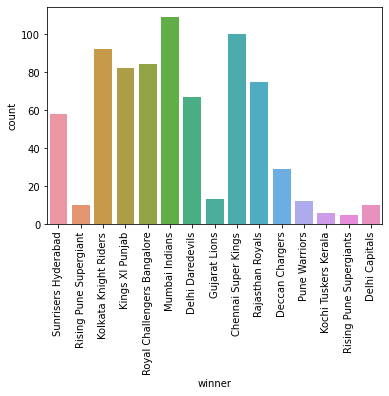

In [11]:
#1. Total no. of wins by each Team.
#Most number of wins
sns.countplot(x = 'winner', data = match_df)
plt.xticks(rotation='vertical')


In [12]:
#Mumbai indians wons mmaximum match count

In [13]:
sixes = score_df[score_df['batsman_runs'] == 6]['batting_team'].value_counts().reset_index()
sixes
#sixes.set_index('bating_team').plot(kind = 'bar',stacked = True, colormap=ListedColormap(sns.color_palette("GnBu", 10)),  figsize=(15,6))

,index,batting_team
0,Royal Challengers Bangalore,1132
1,Mumbai Indians,1096
2,Kings XI Punjab,976
3,Chennai Super Kings,973
4,Kolkata Knight Riders,930
5,Delhi Daredevils,801
6,Rajasthan Royals,681
7,Sunrisers Hyderabad,533
8,Deccan Chargers,400
9,Pune Warriors,196


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

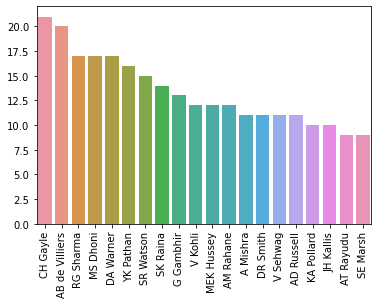

In [14]:
#MAN OF MATCG MOST TIMES top 20   2. Top 20 Players with most MOM awards

MOTM = match_df['player_of_match'].value_counts()
#style()
sns.barplot(x = MOTM.index[:20], y = MOTM.values[:20])
plt.xticks(rotation='vertical')


In [15]:
data = score_df[(score_df['batsman_runs'] == 4) | (score_df['batsman_runs'] == 6)][['batsman','batsman_runs']].groupby('batsman').count().reset_index().sort_values(ascending = False, by = 'batsman_runs')
data

,batsman,batsman_runs
79,CH Gayle,703
353,SK Raina,690
401,V Kohli,673
93,DA Warner,640
305,RG Sharma,625
...,...,...
30,AG Murtaza,1
381,Shivam Sharma,1
386,T Henderson,1
387,T Kohli,1


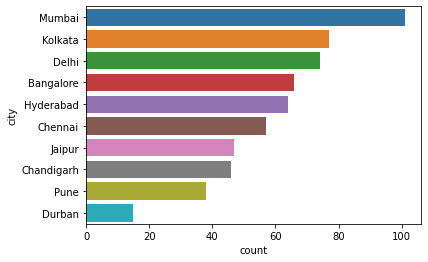

In [16]:
# 3. Which City has hosted most no. of matches?

fav_cities = match_df['city'].value_counts().reset_index()
fav_cities.columns = ['city','count']
sns.barplot(x = 'count',y = 'city', data = fav_cities[:10])

In [17]:
#kkr=match_df[(match_df.team1=="Mumbai Indians") |(match_df.team2=="Chennai Super Kings")]
#kkr

kkr=match_df[(match_df.team1=="Mumbai Indians") & (match_df.team2=="Chennai Super Kings")]
kkr
#sns.countplot(x=kkr,data=match_df)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
117,118,2009,Cape Town,2009-04-18,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,19,0,SR Tendulkar,Newlands,BR Doctrove,K Hariharan,NaN
161,162,2009,Port Elizabeth,2009-05-16,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,ML Hayden,St George's Park,SK Tarapore,SJA Taufel,NaN
256,257,2011,Mumbai,2011-04-22,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,8,0,Harbhajan Singh,Wankhede Stadium,Asad Rauf,AM Saheba,NaN
385,386,2013,Chennai,2013-04-06,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,9,0,KA Pollard,"MA Chidambaram Stadium, Chepauk",M Erasmus,VA Kulkarni,NaN
429,430,2013,Mumbai,2013-05-05,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,60,0,MG Johnson,Wankhede Stadium,HDPK Dharmasena,CK Nandan,NaN
456,457,2013,Kolkata,2013-05-26,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens,HDPK Dharmasena,SJA Taufel,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
489,490,2014,Mumbai,2014-05-10,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,4,DR Smith,Wankhede Stadium,HDPK Dharmasena,VA Kulkarni,NaN
514,515,2014,Mumbai,2014-05-28,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,7,SK Raina,Brabourne Stadium,VA Kulkarni,BNJ Oxenford,NaN
529,530,2015,Mumbai,2015-04-17,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,6,A Nehra,Wankhede Stadium,AK Chaudhary,M Erasmus,NaN


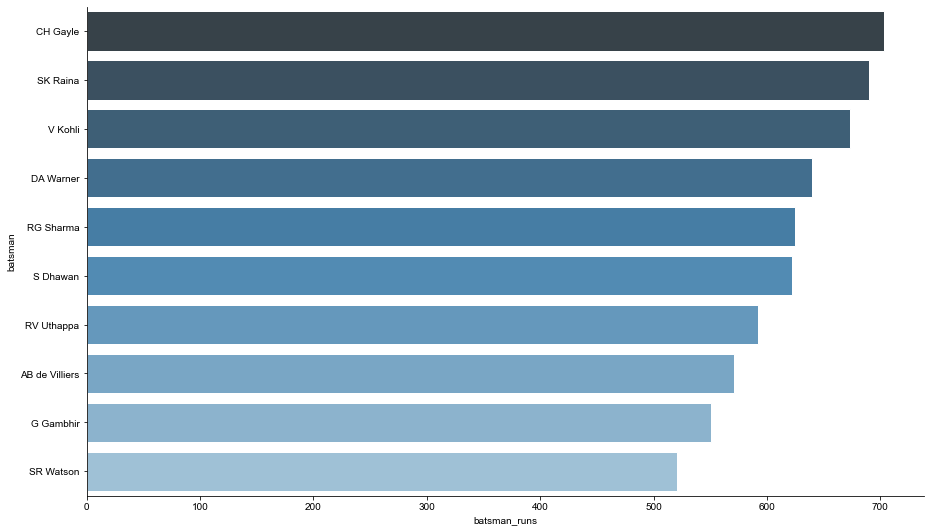

In [18]:
# player with most boundries
data = score_df[(score_df['batsman_runs'] == 4) | (score_df['batsman_runs'] == 6)][['batsman','batsman_runs']].groupby('batsman').count().reset_index().sort_values(ascending = False, by = 'batsman_runs')
plt.subplots(figsize=(15,9))
sns.set_style("whitegrid")
sns.despine()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.barplot(x = 'batsman_runs', y = 'batsman', data = data[:10],palette="Blues_d")

In [19]:
combined_df = pd.merge(match_df, score_df, left_on='id', right_on='match_id')
print (combined_df.columns)

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'match_id', 'inning', 'batting_team', 'bowling_team', 'over',
       'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In [20]:
combined_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [21]:
#Display scores of each team in every season and see which teams scored the higest and lowest scores till date

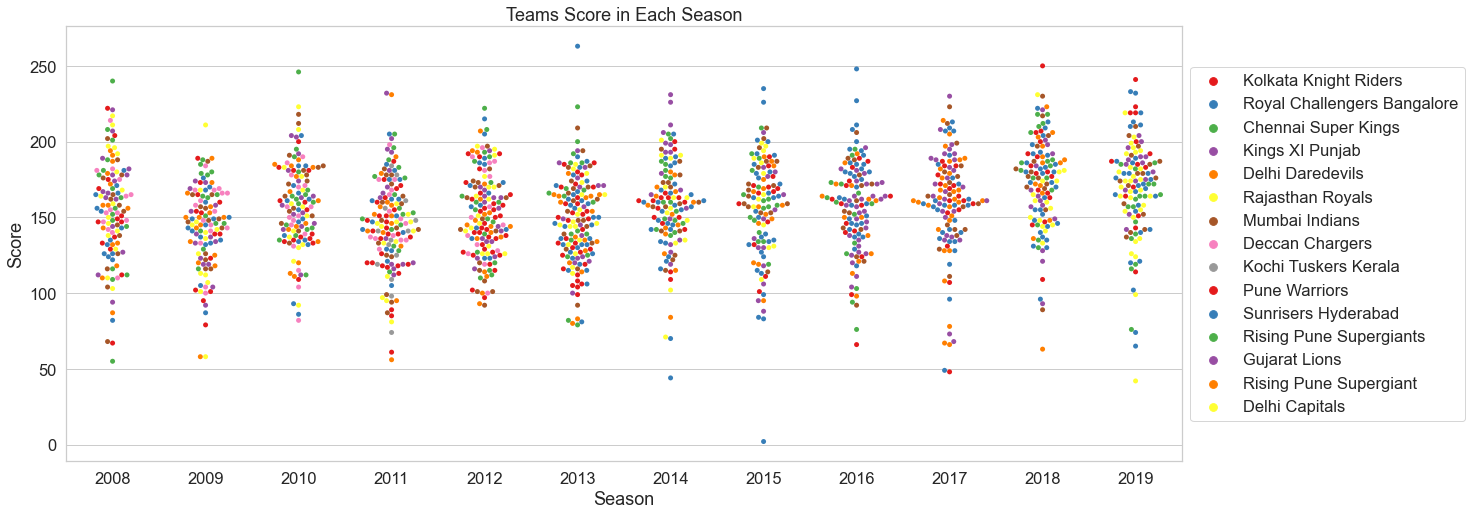

In [32]:
teams_score_per_season = combined_df.loc[: , ['season', 'match_id', 'batting_team', 'total_runs']]
teams_score_per_season = teams_score_per_season.groupby(['season', 'match_id', 'batting_team'])['total_runs'].agg(np.sum).reset_index()
#teams_score_per_season

plt.figure(figsize=(20, 8))
ax0 = plt.subplot(111)
g = sns.swarmplot(x='season', y='total_runs', hue='batting_team', data=teams_score_per_season, ax=ax0, palette='Set1')
g.set_title('Teams Score in Each Season')
g.set_xlabel('Season')
g.set_ylabel('Score')
ax0.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [10]:
bowlers=score_df.groupby('bowler').sum().reset_index()
bowlers

,bowler,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,A Ashish Reddy,109528,442,3805,962,0,8,2,2,2,0,386,14,400
1,A Chandila,92700,348,1314,819,0,0,0,3,0,0,242,3,245
2,A Choudhary,3146,164,1002,402,0,6,0,0,1,0,137,7,144
3,A Dananjaya,197550,50,225,91,0,1,0,0,0,0,47,1,48
4,A Flintoff,8028,84,846,231,0,0,1,0,0,0,105,1,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,YA Abdulla,31818,337,2307,820,0,12,1,3,1,0,294,17,311
401,YK Pathan,448325,1681,10667,4273,0,43,1,27,0,0,1372,71,1443
402,YS Chahal,6477753,2775,19270,6623,0,60,26,24,6,0,2300,116,2416
403,Yuvraj Singh,379750,1316,10519,3134,0,12,6,8,1,0,1065,27,1092


In [13]:
wicket_data=score_df.dropna(subset=['dismissal_kind'])
wicket_data

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
116,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN
160,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,0,0,0,Mandeep Singh,bowled,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179019,11415,2,Chennai Super Kings,Mumbai Indians,11,3,AT Rayudu,SR Watson,JJ Bumrah,0,...,0,0,0,0,0,0,0,AT Rayudu,caught,Q de Kock
179033,11415,2,Chennai Super Kings,Mumbai Indians,13,5,SR Watson,MS Dhoni,HH Pandya,0,...,0,0,0,0,1,0,1,MS Dhoni,run out,Ishan Kishan
179067,11415,2,Chennai Super Kings,Mumbai Indians,19,2,DJ Bravo,SR Watson,JJ Bumrah,0,...,0,0,0,0,0,0,0,DJ Bravo,caught,Q de Kock
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya


In [14]:
wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]

,bowler,count
0,SL Malinga,188
1,DJ Bravo,168
2,A Mishra,165
3,Harbhajan Singh,161
4,PP Chawla,156
5,B Kumar,141
6,R Ashwin,138
7,SP Narine,137
8,UT Yadav,136
9,R Vinay Kumar,127


SpecificationError: nested renamer is not supported

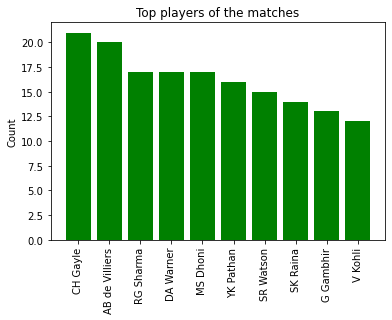

In [23]:
#top players
tp=match_df['player_of_match'].value_counts()[:10]
labels=np.array(tp.keys())
values=np.array(tp)
ind=np.arange(len(labels))

fig,ax=plt.subplots()
rects=ax.bar(ind,values,color='g')
ax.set_xticklabels(labels,rotation='vertical')
ax.set_xticks(ind)
ax.set_ylabel("Count")
ax.set_title("Top players of the matches")
plt.show()

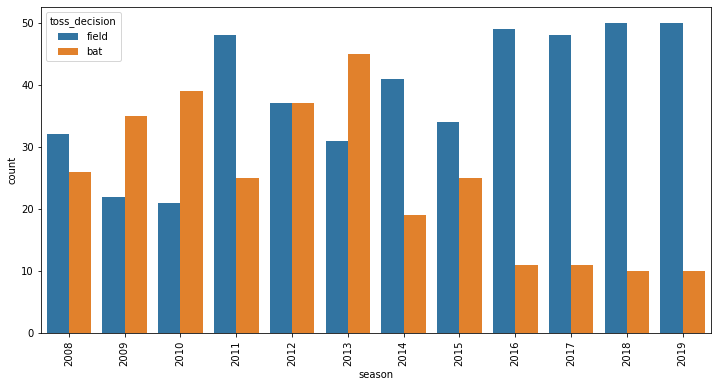

In [25]:
#toss decision
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data=match_df)
plt.xticks(rotation='vertical')
plt.show()

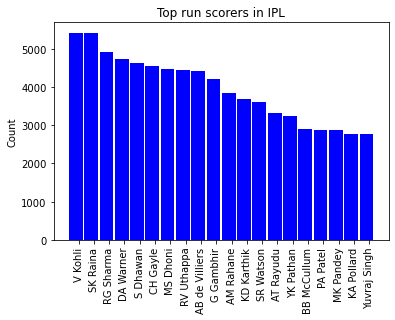

In [50]:
temp_df = score_df.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:20,:]
fig=figsize=(12,9)
labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig,ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='blue')
ax.set_xticks(ind+((width)/5.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top run scorers in IPL")
#autolabel(rects)
plt.show()

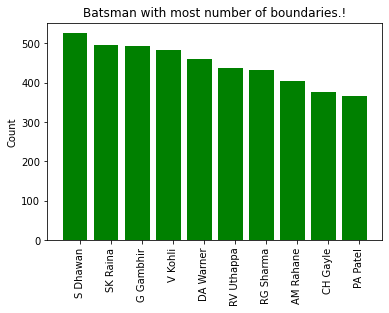

In [35]:
#batman with max boundries
temp_df = score_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.8
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='green')
ax.set_xticks(ind+((width)/5.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of boundaries.!")
#autolabel(rects)
plt.show()

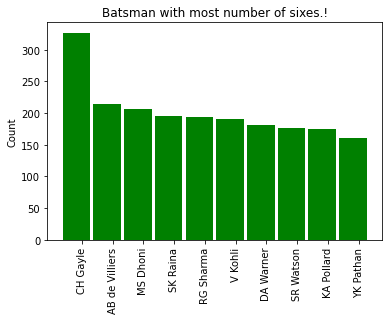

In [39]:
#sixes
temp_df = score_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='green')
ax.set_xticks(ind+((width)/5.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of sixes.!")
#autolabel(rects)
plt.show()

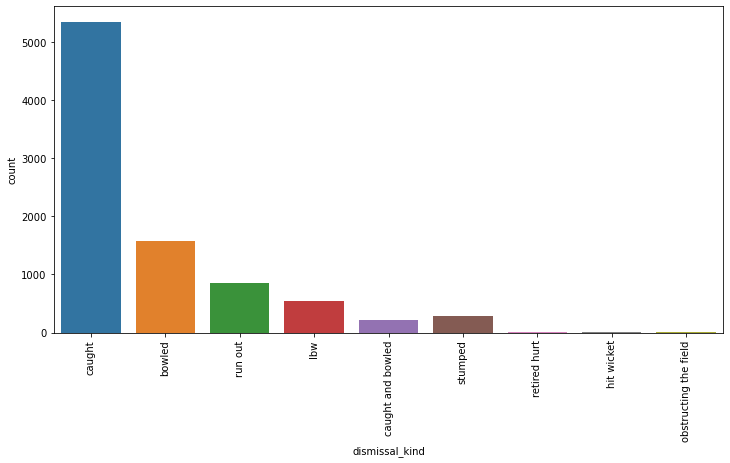

In [40]:
#Dissmasssal kind
plt.figure(figsize=(12,6))
sns.countplot(x='dismissal_kind', data=score_df)
plt.xticks(rotation='vertical')
plt.show()

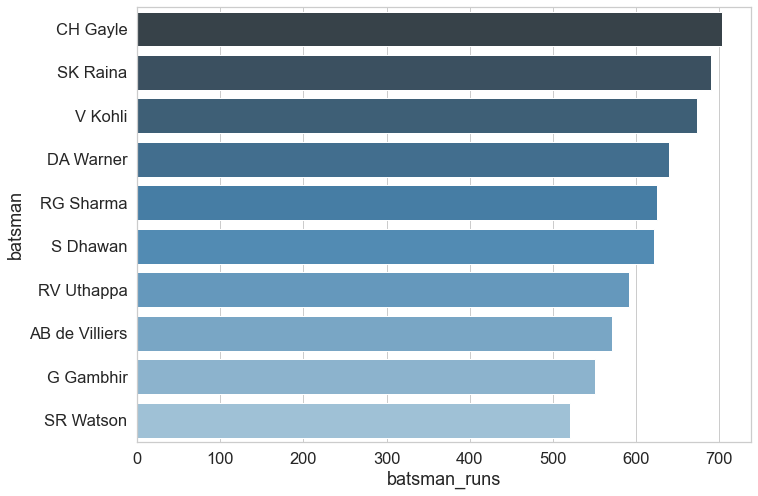

In [55]:
# player with most boundries four or six
data = score_df[(score_df['batsman_runs'] == 4) | (score_df['batsman_runs'] == 6)][['batsman','batsman_runs']].groupby('batsman').count().reset_index().sort_values(ascending = False, by = 'batsman_runs')
plt.subplots(figsize=(11,8))
sns.set_style("whitegrid")
#sns.despine()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.barplot(x = 'batsman_runs', y = 'batsman', data = data[:10],palette="Blues_d")

In [58]:
powerplay_data=combined_df[combined_df['over']<=6]

powerplay_data.groupby(['season','match_id','inning'])['total_runs'].agg(['sum']).reset_index().groupby('season')['sum'].max()

season
2008     78
2009     84
2010     76
2011     87
2012     68
2013     76
2014    100
2015     90
2016     72
2017    105
2018     90
2019     89
Name: sum, dtype: int64

In [59]:
pi1=powerplay_data[ powerplay_data['inning']==1].groupby(['season','match_id'])['total_runs'].agg(['sum'])
pi1.reset_index().groupby('season')['sum'].max()

season
2008    68
2009    68
2010    69
2011    77
2012    68
2013    76
2014    70
2015    76
2016    71
2017    79
2018    90
2019    89
Name: sum, dtype: int64

In [60]:
pi1=powerplay_data[ powerplay_data['inning']==2].groupby(['season','match_id'])['total_runs'].agg(['sum'])
pi1.reset_index().groupby('season')['sum'].max()

season
2008     78
2009     84
2010     76
2011     87
2012     64
2013     64
2014    100
2015     90
2016     72
2017    105
2018     81
2019     76
Name: sum, dtype: int64

In [ ]:
#Orange Cap

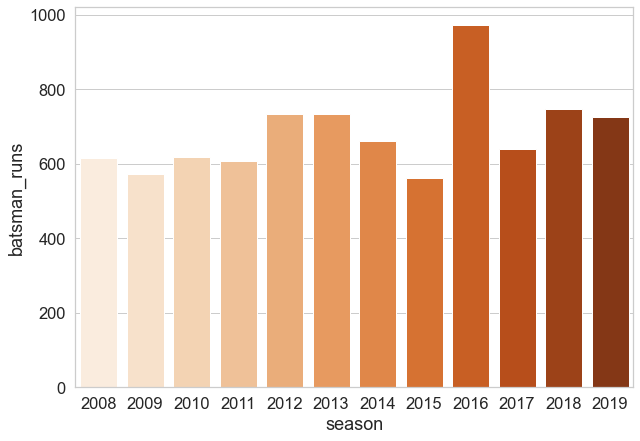

In [28]:
plt.figure(figsize=(10,7))
orange_cap = match_df[['id','season']]
orange_cap = orange_cap.merge(score_df,left_on = 'id', right_on = 'match_id')
orange_cap = orange_cap.groupby(['batsman','season'])['batsman_runs'].sum().reset_index()
orange_cap = orange_cap.sort_values('batsman_runs',ascending=False)
orange_cap = orange_cap.drop_duplicates(subset = ['season'],keep = 'first')
sns.barplot(x = 'season', y = 'batsman_runs', data = orange_cap,palette= 'Oranges')

In [31]:
match_df.groupby('season')['winner'].value_counts().

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
        Kolkata Knight Riders           6
        Royal Challengers Bangalore     4
        Deccan Chargers                 2
2009    Delhi Daredevils               10
        Deccan Chargers                 9
Name: winner, dtype: int64

In [43]:
#seasonwise  winner
new=match_df.groupby('season')['season','winner'].tail(1)
a1=new.sort_values('season',ascending=True)
a1

C:\Users\OWNER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,season,winner
116,2008,Rajasthan Royals
173,2009,Deccan Chargers
233,2010,Chennai Super Kings
306,2011,Chennai Super Kings
380,2012,Kolkata Knight Riders
456,2013,Mumbai Indians
516,2014,Kolkata Knight Riders
575,2015,Mumbai Indians
635,2016,Sunrisers Hyderabad
58,2017,Mumbai Indians


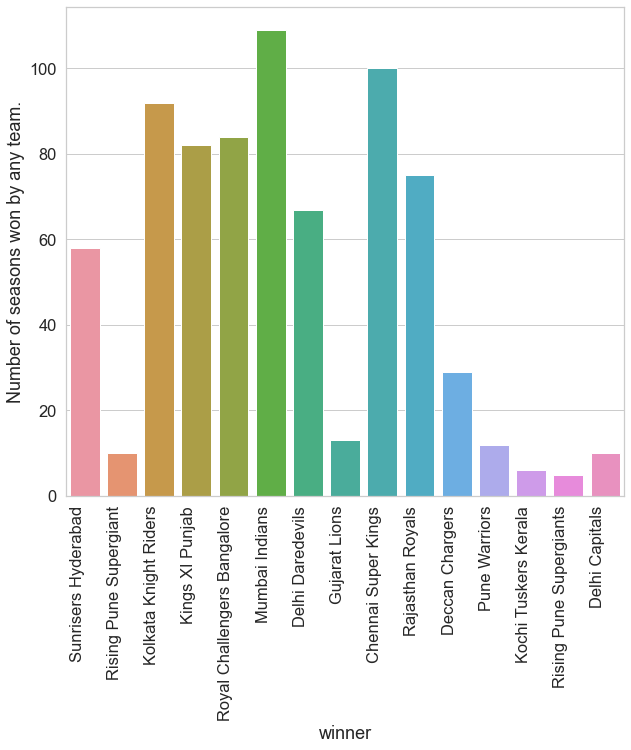

In [49]:
plt.figure(figsize=(10,9))
sns.countplot(match_df['winner'],data=a1)
plt.xticks(rotation = 90, ha = 'right')
plt.ylabel('Number of seasons won by any team.')
plt.show()

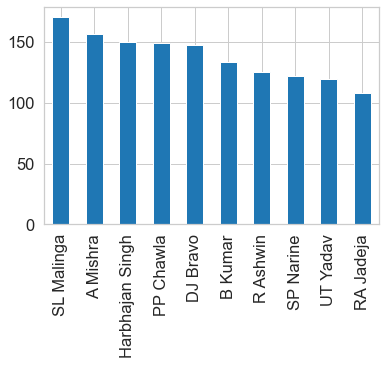

In [53]:

#top 10 bowlers
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"] 
yo=score_df[score_df["dismissal_kind"].isin(dismissal_kinds)]
zz=yo['bowler'].value_counts()[:10].plot.bar()
for p in zz.patches:
    zz
plt.show()